In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the CSV file (replace 'your_file.csv' with the correct file path)
file_path = '/content/drive/MyDrive/Aegis Dataset/heart_disease_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()


,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,target
0,52,1,0,125,212,0,0,1.0,0
1,53,1,0,140,203,1,1,3.1,0
2,70,1,0,145,174,0,1,2.6,0
3,61,1,0,148,203,0,0,0.0,0
4,62,0,0,138,294,1,0,1.9,0


In [ ]:
import pandas as pd

# Step 1: Load the original dataset
data = pd.read_csv('/content/drive/MyDrive/Aegis Dataset/heart_disease_dataset.csv')

# Step 2: Select the relevant columns (9 input features + target)
# Assuming the relevant columns are: 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', and 'target'
relevant_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak','target']

# Step 3: Create a new dataset with only the selected columns
new_data = data[relevant_columns]

# Step 4: Save the new dataset to a CSV file
new_data.to_csv('/content/drive/MyDrive/Aegis Dataset/dataset.csv', index=False)

# Step 5: Now, you can use this new dataset for training and testing your machine learning model.


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Aegis Dataset/dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   exang     1025 non-null   int64  
 7   oldpeak   1025 non-null   float64
 8   target    1025 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 72.2 KB


In [ ]:
df.shape

(1025, 9)

In [ ]:
dp_val = df.duplicated().any()
print(dp_val)

True


In [ ]:
df = df.drop_duplicates()
df.head()

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,target
0,52,1,0,125,212,0,0,1.0,0
1,53,1,0,140,203,1,1,3.1,0
2,70,1,0,145,174,0,1,2.6,0
3,61,1,0,148,203,0,0,0.0,0
4,62,0,0,138,294,1,0,1.9,0


Train and Test [XGBoost]

In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Split the dataset into features (X) and target (y)
X = new_data.drop('target', axis=1)  # Features (input parameters)
y = new_data['target']  # Target (heart disease prediction)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Additional Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 98.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:21:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY GRAPH

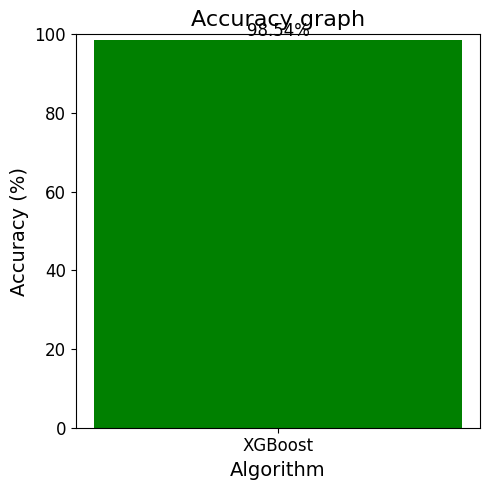

In [21]:
import matplotlib.pyplot as plt

# Step 1: Define the algorithms and their accuracies
algorithm = ['XGBoost']
accuracy = [98.54]

# Step 2: Plot the bar graph
plt.figure(figsize=(5, 5))  # Set the figure size
plt.bar(algorithm, accuracy, color=['green'])

# Step 3: Add labels and title
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Accuracy graph', fontsize=16)
plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Step 4: Display the accuracy values on top of each bar
for i, accuracy in enumerate(accuracy):
    plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha='center', fontsize=12)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,0.093216,0.206040,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,0.143460,0.098322,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,-0.392937,-0.146692,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,0.068526,0.194600,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,0.064099,0.050086,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,0.024729,0.004514,-0.026826
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,1.000000,0.286766,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,0.286766,1.000000,-0.429146
target,-0.221476,-0.283609,0.432080,-0.146269,-0.081437,-0.026826,-0.435601,-0.429146,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   exang     302 non-null    int64  
 7   oldpeak   302 non-null    float64
 8   target    302 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 23.6 KB


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Training Accuracy: 1.00, Testing Accuracy: 0.99
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397
           1       1.00      1.00      1.00       423

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Training Confusion Matrix:
[[397   0]
 [  0 423]]
Testing Confusion Matrix:
[[102   0]
 [  3 100]]


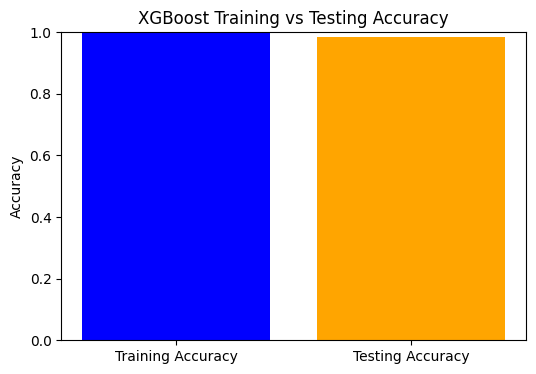

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Aegis Dataset/dataset.csv')

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predictions
train_pred = xgb_model.predict(X_train_scaled)
test_pred = xgb_model.predict(X_test_scaled)

# Performance metrics
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

train_report = classification_report(y_train, train_pred)
test_report = classification_report(y_test, test_pred)

train_cm = confusion_matrix(y_train, train_pred)
test_cm = confusion_matrix(y_test, test_pred)

print(f"XGBoost - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")
print(f"Training Classification Report:\n{train_report}")
print(f"Testing Classification Report:\n{test_report}")
print(f"Training Confusion Matrix:\n{train_cm}")
print(f"Testing Confusion Matrix:\n{test_cm}")

# Visualization
plt.figure(figsize=(6, 4))
plt.bar(["Training Accuracy", "Testing Accuracy"], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title("XGBoost Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()
